In [20]:
para1 = 'You are musicophile,” One who loves music”. In your interactions with your MCA classmates you found another musicophile ,”Ameyatma”(classmate) and become friends. Now you want to flaunt your programming skills and love for music to your friend. Write a class called “showoff” which has a instance variable “song”(String datatype) and a method called “unscramble”. The method unscrambles the words in the string “song” and prints it. The variable “song” is a stanza from a song but is strange.It has words and numbers in between them, you need to order the words depending on the numbers and print the correct stanza. Consider the following example and run yourprogram for the given two testcases. Create an object of the class and call the method.'
para2 = "Social media mining is the process of obtaining big data fromuser-generated contenton social media sites andmobile appsin order to extract actionable patterns, form conclusions about users, and act upon the information, often for the purpose of advertising to users or conducting research. The term is an analogy to the resource extraction process ofminingfor rare minerals.Resource extraction mining requires mining companies to shift through vast quantities of raw ore to find the precious minerals; likewise, social media mining requires human data analysts and automated software programs to shift through massive amounts of raw social media data in order to discern patterns and trends relating to social media usage, online behaviours, sharing of content, connections between individuals, online buying behaviour, and more. These patterns and trends are of interest to companies, governments and not-for-profit organizations, as these organizations can use these patterns and trends to design their strategies or introduce new programs, new products, processes or services.Social media mining uses a range of basic concepts fromcomputer science,datamining,machine learningandstatistics. Social media miners developalgorithmssuitable for investigating massive files of social media data. Social media mining is based on theories and methodologies fromsocial network analysis,network science,sociology,ethnography,optimization and mathematics. It encompasses the tools to formally represent, measure and model meaningful patterns from large-scale social media data. [1] In the 2010s, major corporations,governments and not-for-profit organizations engaged in social media mining to obtain data about customers, clients and citizens"

In [4]:
from nltk.tokenize import word_tokenize
import pandas as pd
import nltk

#### Word Tokenize(Tokenization is the process of breaking down text into smaller units, known as tokens, which can be words, numbers, or punctuation marks.)

In [5]:
words = word_tokenize(para1)
words2 = word_tokenize(para2)

In [6]:
print("len-para1 :", len(words))
print("len-para2 :" ,len(words2))

len-para1 : 153
len-para2 : 271


In [7]:
df=pd.DataFrame(words)
df2=pd.DataFrame(words2)

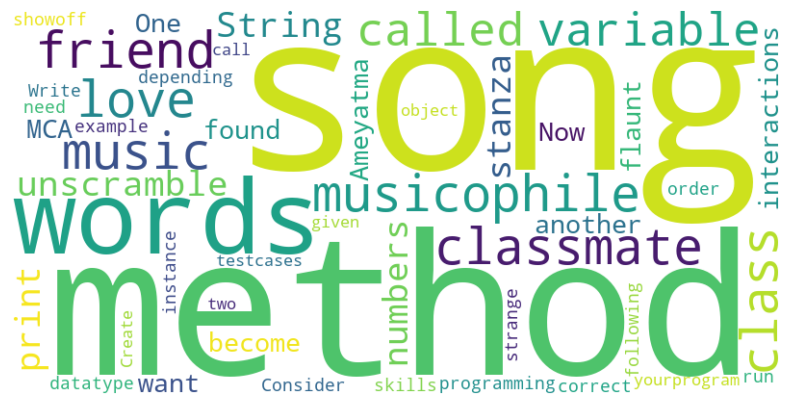

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(para1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


ABOVE IS THE WORDCLOUD WITHOUT LOOKING THE FREQUENCY

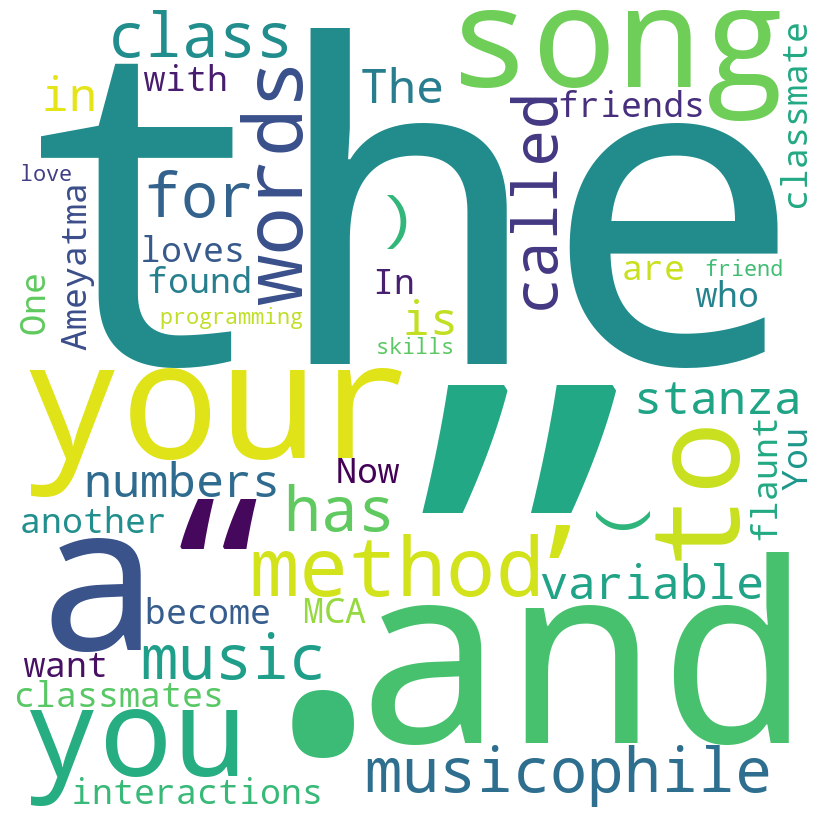

In [9]:
word_freq = nltk.FreqDist(words)
top_50_words = word_freq.most_common(50)
wordcloud1 = WordCloud(width=800, height=800, 
                       background_color='white', 
                       stopwords=nltk.corpus.stopwords.words('english'), 
                       min_font_size=10).generate_from_frequencies(dict(top_50_words))

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()



ABOVE IS THE WORD CLOUD BY LOOKING THE FREQUENCY

#### Stop Word Removel

In [10]:
from nltk.corpus import stopwords
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    return filtered_tokens

In [11]:
df_stop_word = df.apply(remove_stopwords)
df2_stop_word = df2.apply(remove_stopwords)

In [12]:
print(len(df_stop_word))
print(len(df2_stop_word))

101
206


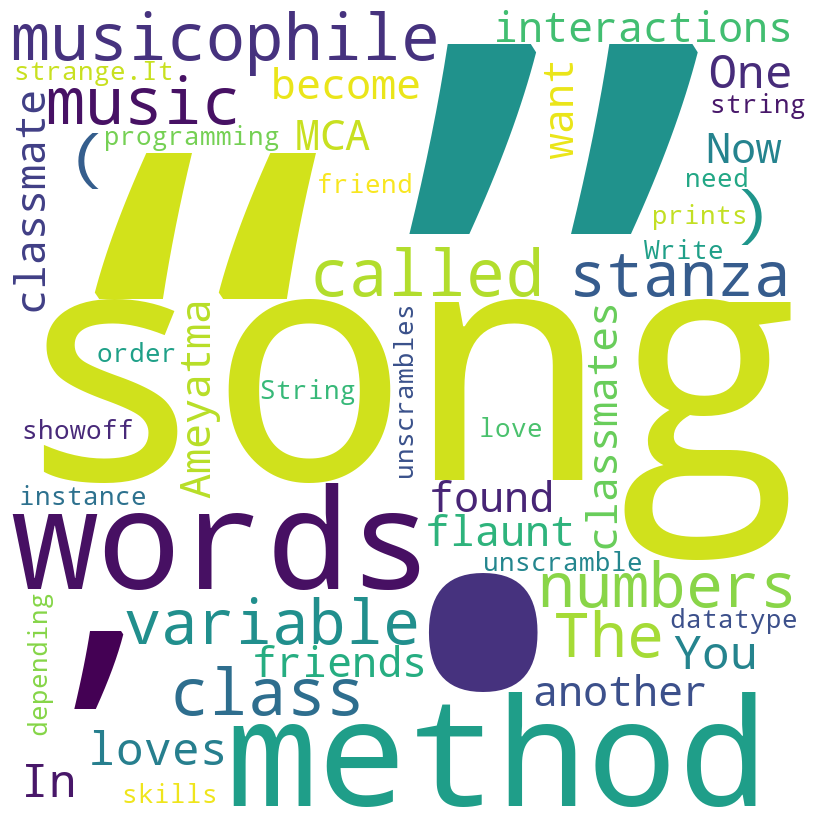

In [13]:
word_freq = nltk.FreqDist(df_stop_word[0])

# Get the 50 most common words
top_50_words = word_freq.most_common(50)

# Generate the word cloud
wordcloud2 = WordCloud(width=800, height=800, 
                       background_color='white', 
                       stopwords=nltk.corpus.stopwords.words('english'), 
                       min_font_size=10).generate_from_frequencies(dict(top_50_words))

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()

IN THE ABOVE WORD CLOUD STOPWORDS ARE REMOVED

#### stemming

In [14]:
from nltk.stem import PorterStemmer
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [15]:
df_stemming = df_stop_word.apply(stem_tokens)
df_stemming_2 = df2_stop_word.apply(stem_tokens)
print(len(df_stemming))
print(len(df_stemming_2))

101
206


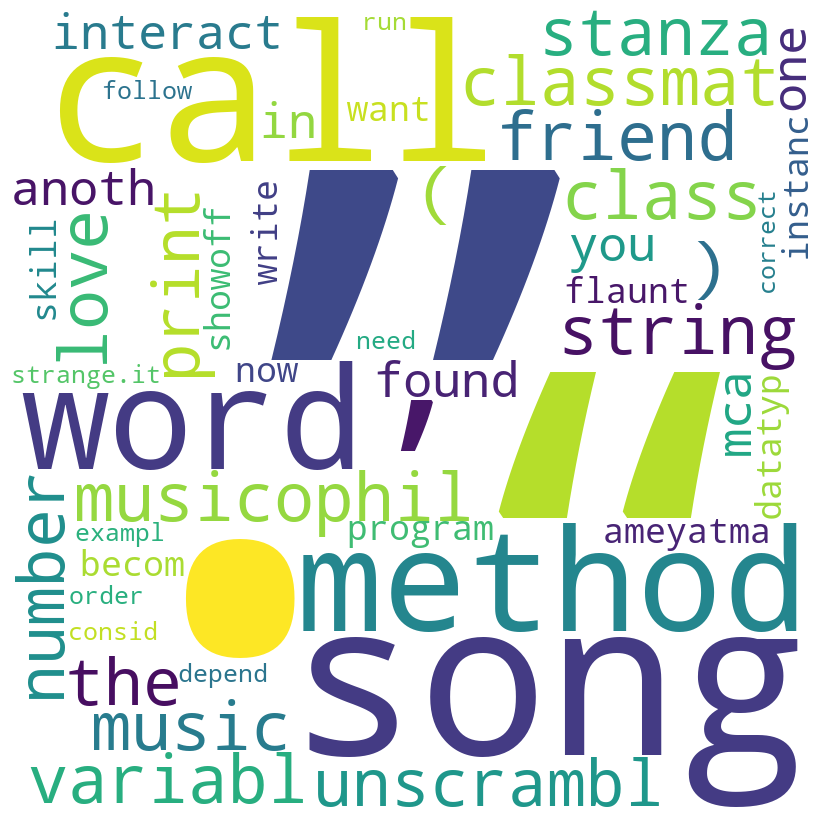

In [16]:
word_freq = nltk.FreqDist(df_stemming[0])

# Get the 50 most common words
top_50_words = word_freq.most_common(50)

# Generate the word cloud
wordcloud2 = WordCloud(width=800, height=800, 
                       background_color='white', 
                       stopwords=nltk.corpus.stopwords.words('english'), 
                       min_font_size=10).generate_from_frequencies(dict(top_50_words))

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()

#### lemmatization

In [17]:
import re
from nltk.stem import WordNetLemmatizer
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # cleaned_tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in lemmatized_tokens if token.isalpha()]
    return lemmatized_tokens

In [18]:
df_lem = df_stemming.apply(lemmatize_tokens)
df_lem_2 = df_stemming_2.apply(lemmatize_tokens)

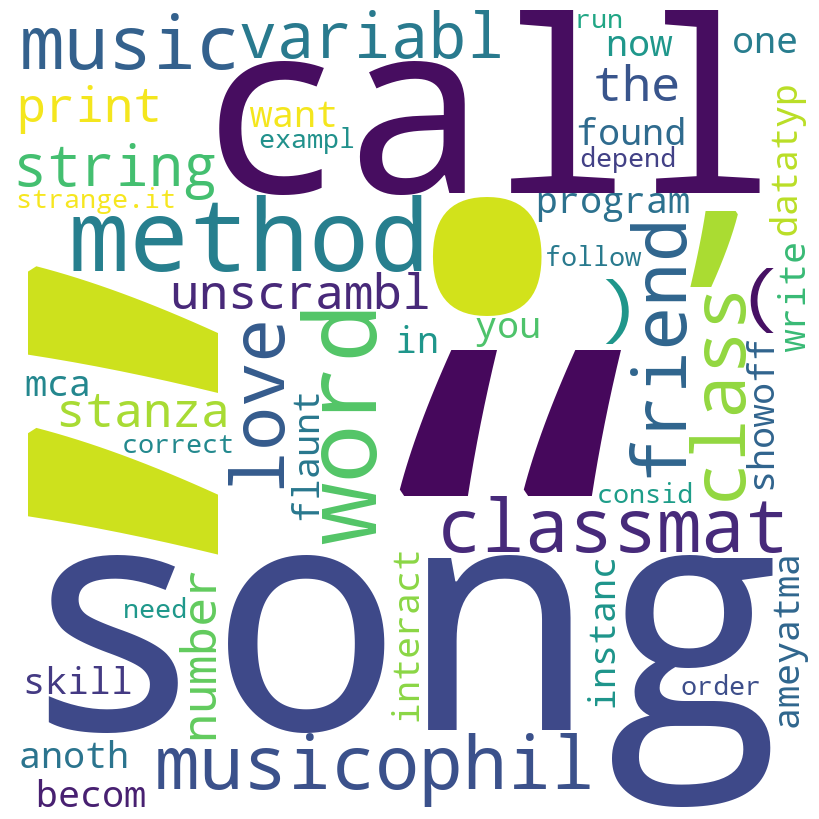

In [19]:
word_freq = nltk.FreqDist(df_lem[0])

# Get the 50 most common words
top_50_words = word_freq.most_common(50)

# Generate the word cloud
wordcloud2 = WordCloud(width=800, height=800, 
                       background_color='white', 
                       stopwords=nltk.corpus.stopwords.words('english'), 
                       min_font_size=10).generate_from_frequencies(dict(top_50_words))

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()